In [1]:
import cv2
import matplotlib.pyplot as plt
import sys
import numpy as np
from RetinaFace.retinaface import RetinaFace_mgr


In [2]:
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
cap.set(cv2.CAP_PROP_FOURCC, cv2.VideoWriter_fourcc('M','J','P','G'))
res,frame = cap.read()

In [3]:
res

True

In [4]:
print(type(frame))
print(frame.shape)

<class 'numpy.ndarray'>
(720, 1280, 3)


In [5]:
original = cv2.imread('./lena.jpg',cv2.IMREAD_COLOR)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original.shape

(396, 340, 3)

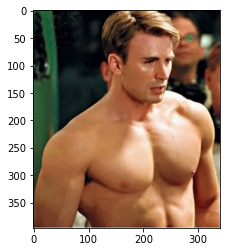

In [6]:
plt.imshow(original)

In [7]:
detector = RetinaFace_mgr()

	[Network] pth/d_net2.tar
	[Network] pth/d_net.pth


In [8]:
boxes = detector(original,'color')

In [9]:
boxes

[[165, 45, 252, 161, 216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]

In [10]:
np.shape(boxes) # 사람 수, ?

(1, 14)

In [11]:
result_boxes = []
lm = []
num_faces = len(boxes)

In [12]:
num_faces

1

In [13]:
frame_h, frame_w, _ = original.shape

In [14]:
print(frame_h)
print(frame_w)
print(_)

396
340
3


In [15]:
for box in boxes :
    left, top, right, bottom = box[:4]

In [16]:
w = right - left
h = bottom - top

In [17]:
print(left,right,top,bottom)

165 252 45 161


In [18]:
print(w,h) # 박스의 가로. 박스의 세로

87 116


In [19]:
lm.append([box[4:]])
result_boxes.append([left,top,right,bottom,int(w*h)]) # 마지막 총 픽셀 수

In [20]:
lm

[[[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]]

In [21]:
result_boxes

[[165, 45, 252, 161, 10092]]

In [22]:
np.shape(lm) # 몇 번째 프레임, 몇 명 있었는지, 박스 영역제외 나머지

(1, 1, 10)

In [23]:
# 갤러리가 있으면 출력할 값
lm[0] # 이번 프레임의 사람수 와, 박스 영역 나머지

[[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]

In [24]:
# 갤러리가 없으면
print(num_faces)
print(result_boxes)
print(lm)

1
[[165, 45, 252, 161, 10092]]
[[[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]]


In [25]:
bbox_list = result_boxes
lm_list = lm

In [54]:
# get_boxed_frame
# (image, start 좌표, end 좌표)
cut_frame = cv2.rectangle(original,(left,top),(right,bottom),(255,0,0),thickness=2)
cv2.rectangle(cut_frame, (bbox[0], bbox[3]+10), (bbox[2], bbox[3]+38), (255,255,255), thickness=-1)
cv2.putText(cut_frame, 'iron man', (bbox[0],bbox[3]+30), cv2.FONT_HERSHEY_COMPLEX, fontScale=0.7, thickness=2, color=(255,255,255))

cut_frame = cv2.putText(cut_frame,str(99.999),(bbox[0],bbox[3]+30),cv2.FONT_HERSHEY_COMPLEX, fontScale=0.7, thickness=1,color=(255,0,20))

In [55]:
cut_frame.shape

(396, 340, 3)

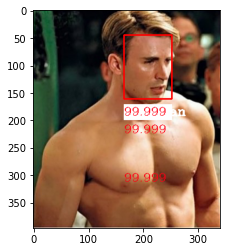

In [56]:
plt.imshow(cut_frame)

In [29]:
result_frame = cut_frame

In [30]:
print(lm)
lm = np.array(lm).astype(np.float32).reshape((5,2))
print(lm)

[[[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]]
[[216.  91.]
 [245.  94.]
 [241. 118.]
 [215. 136.]
 [236. 139.]]


In [31]:
from skimage import transform as trans
src = np.array([
            [30.2946, 51.6963],
            [65.5318, 51.5014],
            [48.0252, 71.7366],
            [33.5493, 92.3655],
            [62.7299, 92.2041] ], dtype=np.float32 )        
tform = trans.SimilarityTransform()

In [32]:
# src : (n,2) array, dct : (n,2) array
estimate(lm,src)

NameError: name 'estimate' is not defined

In [33]:
M = tform.params[0:2, :]

In [34]:
# (src image, M = 변환 행렬, output image size)
warped = cv2.warpAffine(original, M, (112,112), borderValue=0.0)

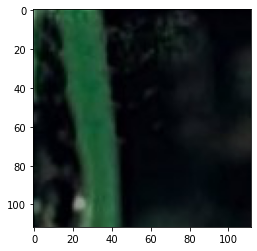

In [35]:
plt.imshow(warped)

In [36]:
# bbox = 박스 영역 포인트 4개와 총픽셀값, lm_list 는 5개의 landmark
for bbox, lm in zip(bbox_list, lm_list) :
    print(bbox,lm)
    # get_face function에 input으로 오리지널 이미지와 lm3
    prob_face = get_face

[165, 45, 252, 161, 10092] [[216, 91, 245, 94, 241, 118, 215, 136, 236, 139]]


NameError: name 'get_face' is not defined